In [30]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from math import floor
# import datetime

In [31]:
from traces.constants import SUBMISSION_TIME, START_TIME, END_TIME, JOB_TYPE, SOURCE

# Inputs

In [32]:
TRACE = 'traces/facebook/out/2009_1.csv'

# time slot length
DELTA = 60 * 60

# Constructing loads

In [33]:
t = pd.read_csv(TRACE)

## Determine load types

In [34]:
load_types = list(t[[JOB_TYPE, SOURCE]].drop_duplicates().itertuples(index=False, name=None))
load_types

[(0, 0)]

## Compute loads per load type

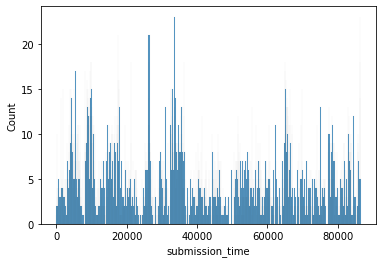

In [35]:
all_loads = []
for job_type, source in load_types:
  sub_t = t[t[JOB_TYPE] == job_type][t[SOURCE] == source]
  fig = sb.histplot(sub_t[SUBMISSION_TIME], binwidth=DELTA)
  loads = np.array([h.get_height() for h in fig.patches])
  all_loads.extend(loads)

## Store computed loads

In [36]:
pd.DataFrame(all_loads, columns=load_types).to_csv('out/loads.csv')